In [3]:
import tensorflow as tf

# Load the MNIST dataset.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess the data.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = (y_train == 3) | (y_train == 7)  # Keep only 3 and 7.
y_test = (y_test == 3) | (y_test == 7)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

x_train_flat = x_train.flatten()
x_test_flat = x_test.flatten()
ds_train = tf.data.Dataset.from_tensor_slices((x_train,y_train))
ds_test = tf.data.Dataset.from_tensor_slices((x_test, y_test))

# Define the model.
logistic_regression = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(units=1, activation='sigmoid'),
])
model = logistic_regression
model.summary()

# Compile the model.
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model.
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 785       
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2130 - accuracy: 0.9197 - val_loss: 0.1630 - val_accuracy: 0.9427
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1678 - accuracy: 0.9379 - val_loss: 0.1531 - val_accuracy: 0.9436
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1630 - accuracy: 0.9402 - val_loss: 0.1500 - val_accuracy: 0.9461
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1609 - accur

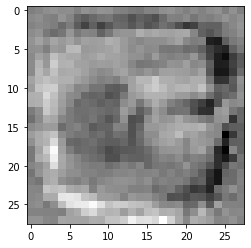

In [4]:
import matplotlib.pyplot as plt

# Get the weights of the model
weights = model.get_weights()

# Plot the weights as a 2D plot
plt.imshow(weights[0].reshape(28, 28), cmap='gray')
plt.show()

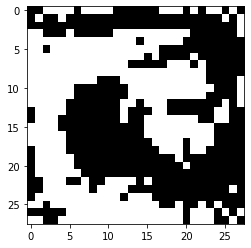

In [5]:
import numpy as np

# Plot the sign of the weights as a 2D plot
plt.imshow(np.sign(weights[0]).reshape(28, 28), cmap='gray')
plt.show()

In [6]:
def get_adversial_exemple(model, dataset, eps):
  adversarial_examples = []
  for images, labels in dataset:
    with tf.GradientTape() as tape:
      tape.watch(images)
      predictions = model(images)
      loss = tf.keras.losses.sparse_categorical_crossentropy(labels, predictions)
    gradient = tape.gradient(loss, images)
    signed_grad = tf.sign(gradient)
    adversarial_example = images + eps * signed_grad
    adversarial_example = tf.clip_by_value(adversarial_example, 0, 1)
    adversarial_examples.append(adversarial_example)
  adversarial_examples = np.concatenate(adversarial_examples,axis=0)
  return adversarial_examples

# Ne marche pas à partir d'ici

In [9]:
X_train_adv = get_adversial_exemple(model, ds_train, eps=0.25)
X_train_adv = np.array(X_train_adv)
X_test_adv = get_adversial_exemple(model, ds_test, eps=0.25)
X_test_adv = np.array(X_test_adv)

ValueError: Input 0 of layer dense_2 is incompatible with the layer: expected axis -1 of input shape to have value 784 but received input with shape (28, 28)

NameError: name 'x_test' is not defined

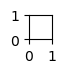

In [ ]:
#Afficher les images
import matplotlib.pyplot as plt
plt.figure(figsize=(7.195, 3.841), dpi=100)
plt.figure(1)
for i in range(200):
  plt.subplot(10,20,i+1)
  plt.imshow(x_test[i,:].reshape([28,28]), cmap='gray')
  plt.axis('off')
plt.figure(2)
for i in range(200):
  plt.subplot(10,20,i+1)
  plt.imshow(x_test_adv[i,:].reshape([28,28]), cmap='gray')
  plt.axis('off')
plt.show()